# Linear Regression with Stochastic Gradient Descent

Write a program which computes the solution using stochastic gradient descent.  You may use a minibatch size of 5 data points. For convergence, remember to decrease the learning rate over time.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys

data = np.genfromtxt('linear.csv', delimiter=',')

learn_rate = .1
num_samples = data.shape[0]
print("No. of samples:", num_samples)

np.random.shuffle(data)
X = data[:,1:]
Y = data[:,0]

print("Features, X: ", X.shape)
print("Response, Y: ", Y.shape)

No. of samples: 50
Features, X:  (50, 4)
Response, Y:  (50,)


We decide to shuffle and sample without replacement. 

Define the function `get_minibatch` to extract a mini batch of data.

`get_minibatch_grad` will predict values `y_pred` for the current theta, compute the error, then calculate the gradient of the loss.

In [2]:
def get_minibatch(data, start_index, batch_size):
    X = data[:,1:]
    Y = data[:,0]
    X_mini = X[start_index:start_index+batch_size]
    Y_mini = Y[start_index:start_index+batch_size]
    return X_mini, Y_mini

def get_minibatch_grad(minibatch, theta):
    minibatch_X = minibatch[0] # 5 samples, 4 features each incl. 1 constant feature
    minibatch_Y = minibatch[1]
    y_pred = minibatch_X.dot(theta)
    err = minibatch_Y - y_pred.squeeze()
    grad = -minibatch_X.T.dot(err) / minibatch[0].shape[0]
    
    # Prints for visualization, if I ever need them again
    # print("THE X FEATURES:" ,minibatch_X.shape, minibatch_X)
    # print("THE ACTUAL Y LABELS:" ,minibatch_Y.shape, minibatch_Y)
    # print("PREDICTED Y VALS FOR THIS 5-BATCH OF X: ", y_pred.shape, y_pred)
    # print("PREDICTED Y SQUEEZED: ", y_pred.squeeze().shape, y_pred.squeeze())
    # print("ERR FOR EACH OF 5 SAMPLES: ", err)
    # print("GRAD: ", grad.shape, grad)
    
    return grad
    

def sgd(theta_init, learn_rate_init, batch_size):
    theta = theta_init
    learn_rate = learn_rate_init
    loss = 0
    for i in range(0, num_samples, batch_size):
        minibatch = get_minibatch(data, i, batch_size)
        batch_grad = get_minibatch_grad(minibatch, theta)
        theta = theta.squeeze() - learn_rate * batch_grad
        learn_rate = learn_rate/(1+i)
        loss = (1/batch_size)*np.sum(Y-X.dot(theta))
        
        # Prints for visualization
        # print("BATCHGRAD", batch_grad.shape, batch_grad)
        # print("THETA OLD", theta.shape, theta)
        # print("THETA NEW", theta.shape, theta)
        # print("LEARN RATE", learn_rate)
    return loss, theta
        
theta_init = np.ones((1,4))
prev_loss = sys.maxsize
theta = theta_init
losses = [] # for plotting
iteration = 0 # for plotting

while True:
    iteration += 1
    loss, theta = sgd(theta.T ,learn_rate,5)
    print("LOSS: ", loss)
    losses.append(loss)
    loss_diff = abs(prev_loss - loss)
    if loss_diff < 0.000001:
        break
    prev_loss = loss

LOSS:  -22.086336174786794
LOSS:  -16.64583958102239
LOSS:  -13.048554226175057
LOSS:  -10.603352742600666
LOSS:  -8.884668993644203
LOSS:  -7.629896922225029
LOSS:  -6.6764781950948136
LOSS:  -5.9233217982606865
LOSS:  -5.3071411586933275
LOSS:  -4.787937298457436
LOSS:  -4.340089787358052
LOSS:  -3.946886339541239
LOSS:  -3.597161203722474
LOSS:  -3.2832270286327687
LOSS:  -2.9996003191149363
LOSS:  -2.7422139770341363
LOSS:  -2.5079289750074234
LOSS:  -2.294229893822188
LOSS:  -2.099033616175349
LOSS:  -1.9205677914008132
LOSS:  -1.7572924388954232
LOSS:  -1.6078483314525334
LOSS:  -1.4710221006901048
LOSS:  -1.3457218721478865
LOSS:  -1.2309596096532296
LOSS:  -1.1258378048641309
LOSS:  -1.0295390426337725
LOSS:  -0.9413175231275789
LOSS:  -0.8604919605850676
LOSS:  -0.786439487880637
LOSS:  -0.7185903256555486
LOSS:  -0.656423055465091
LOSS:  -0.5994603869423641
LOSS:  -0.5472653409770368
LOSS:  -0.4994377914371539
LOSS:  -0.45561132138045324
LOSS:  -0.4154503586875642
LOSS:  -0.3

In [3]:
print(theta)

[-0.57607184  1.30261501 -0.02598882 -1.87047472]


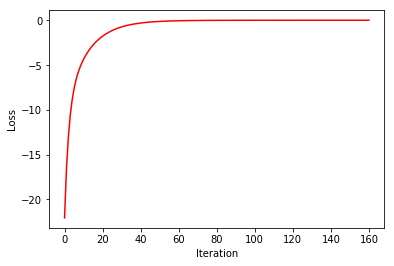

In [4]:
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(np.arange(iteration), losses, 'r')
plt.show()